In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("politifact_clean_binarized.csv")

In [3]:
print(df.columns)

Index(['statement', 'source', 'link', 'veracity'], dtype='object')


In [4]:
print(df.dtypes)

statement    object
source       object
link         object
veracity      int64
dtype: object


In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

In [6]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abhih\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhih\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abhih\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove punctuation
    tokens = [word for word in tokens if word.isalnum()]
    # Convert to lowercase
    tokens = [word.lower() for word in tokens]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into string
    return ' '.join(tokens)

# Apply preprocessing to the 'statement' column
df['clean_statement'] = df['statement'].apply(preprocess_text)

In [8]:
!pip install textblob


In [9]:
from textblob import TextBlob

def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    return sentiment_score

# Apply sentiment analysis to the 'clean_statement' column
df['sentiment_score'] = df['clean_statement'].apply(analyze_sentiment)

In [10]:
df.head()

,statement,source,link,veracity,clean_statement,sentiment_score
0,"Sen. Kamala Harris is ""supporting the animals ...",Donald Trump,/web/20180705082623/https://www.politifact.com...,0,kamala harris supporting animal,0.25
1,"Says Ronald Reagan said immigrants ""brought wi...",Becoming American Initiative,/web/20180705082623/https://www.politifact.com...,1,say ronald reagan said immigrant brought coura...,0.80
2,"Says Democratic Senators ""demand Supreme Court...",Viral image,/web/20180705082623/https://www.politifact.com...,0,say democratic senator demand supreme court no...,0.00
3,"""Tim Kaine doesn’t want a border at all. He wa...",Corey Stewart,/web/20180705082623/https://www.politifact.com...,0,tim kaine want border want get rid immigration...,0.00
4,"""George H.W. Bush has died at 94.""",Bloggers,/web/20180705082623/https://www.politifact.com...,0,george bush died 94,0.00


In [11]:
df.to_csv("new_df.csv")

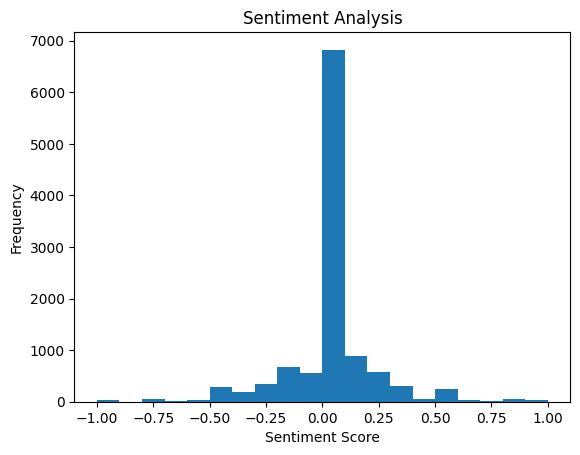

In [12]:
import matplotlib.pyplot as plt

# Plot sentiment scores
plt.hist(df['sentiment_score'], bins=20)
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [13]:
!pip install spacy

In [14]:
!python -m spacy download en_core_web_sm


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.3/12.8 MB 6.8 MB/s eta 0:00:02
     --- ------------------------------------ 1.1/12.8 MB 11.7 MB/s eta 0:00:02
     ----- ---------------------------------- 1.9/12.8 MB 15.1 MB/s eta 0:00:01
     ------- -------------------------------- 2.5/12.8 MB 13.2 MB/s eta 0:00:01
     ----------- ---------------------------- 3.7/12.8 MB 15.8 MB/s eta 0:00:01
     -------------- ------------------------- 4.6/12.8 MB 16.2 MB/s eta 0:00:01
     ----------------- ---------------------- 5.4/12.8 MB 16.6 MB/s eta 0:00:01
     ------------------- -------------------- 6.3/12.8 MB 16.8 MB/s eta 0:00:01
     ---------------------- ----------------- 7.1/12.8 MB 16.8 MB/s eta 0:00:01
     ------------------------- -------------- 8.0/12.8 MB 17.1 MB/s eta 0:00:01
     --------------------------- ------------ 8.9/12.8 MB 17.2 MB/s eta 0:00:01
     ------------------------------ --------- 9.7

In [15]:
import spacy

# Load spaCy's English language model
nlp = spacy.load('en_core_web_sm')

# Function for Named Entity Recognition (NER)
def extract_entities(text):
    doc = nlp(text)
    entities = [ent.text for ent in doc.ents]
    return entities

# Apply NER to the 'clean_statement' column
df['entities'] = df['clean_statement'].apply(extract_entities)

# Function for Keyword Extraction
def extract_keywords(text):
    doc = nlp(text)
    # Filter out non-alpha tokens and stop words
    keywords = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
    return keywords

# Apply keyword extraction to the 'clean_statement' column
df['keywords'] = df['clean_statement'].apply(extract_keywords)

In [16]:
from collections import Counter

# Count the occurrences of entities
entity_counts = Counter([entity for entities in df['entities'] for entity in entities])
print("Top Entities:")
print(entity_counts.most_common(10))

# Count the occurrences of keywords
keyword_counts = Counter([keyword for keywords in df['keywords'] for keyword in keywords])
print("\nTop Keywords:")
print(keyword_counts.most_common(10))

Top Entities:
[('american', 376), ('republican', 347), ('texas', 329), ('one', 328), ('florida', 254), ('first', 225), ('democrat', 215), ('obama', 205), ('hillary clinton', 195), ('senate', 193)]

Top Keywords:
[('state', 1425), ('percent', 1254), ('year', 1242), ('tax', 1090), ('obama', 956), ('president', 726), ('health', 665), ('people', 656), ('vote', 626), ('job', 620)]


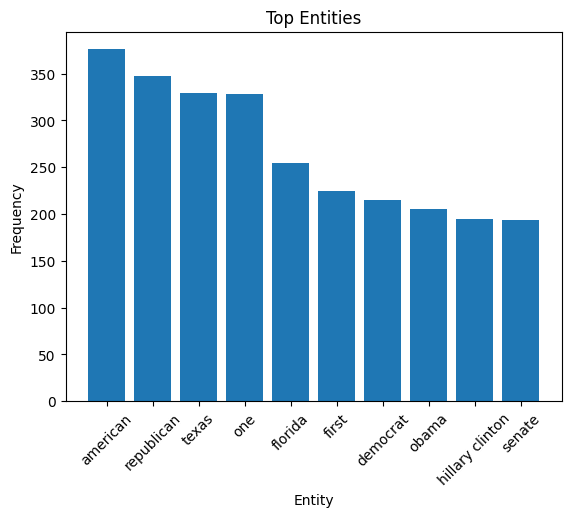

In [17]:
# Visualize top entities
top_entities = entity_counts.most_common(10)
entities, counts = zip(*top_entities)
plt.bar(entities, counts)
plt.title('Top Entities')
plt.xlabel('Entity')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

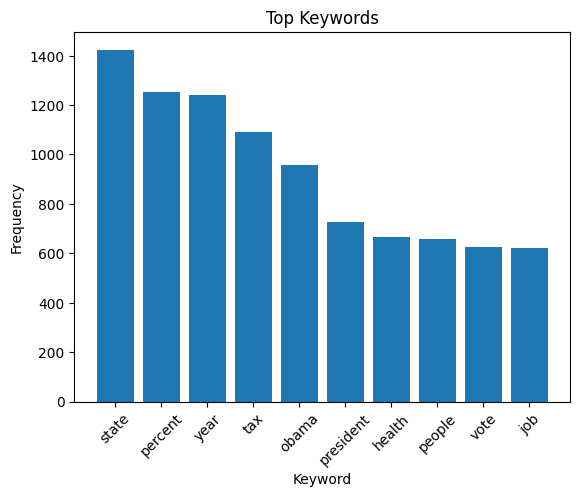

In [18]:
# Visualize top keywords
top_keywords = keyword_counts.most_common(10)
keywords, counts = zip(*top_keywords)
plt.bar(keywords, counts)
plt.title('Top Keywords')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [19]:
from collections import Counter

def word_consistency_probability(text):
    # Tokenize the text into words
    words = text.split()
    
    # Calculate the frequency of occurrence of each word within the text
    word_freq = Counter(words)
    
    # Calculate the total number of words in the text
    total_words = len(words)
    
    # Calculate the probability of consistency for each word
    consistency_probabilities = {}
    for word, count in word_freq.items():
        consistency_probabilities[word] = count / total_words
    
    return consistency_probabilities

# Example text
example_text = "This is an example text for calculating consistency probability of words in a given text. Example is repeated multiple times for demonstration purposes."

# Calculate the probability of consistency
probabilities = word_consistency_probability(example_text.lower())

# Print the probabilities
for word, probability in probabilities.items():
    print(f"Probability of consistency for '{word}': {probability:.4f}")


Probability of consistency for 'this': 0.0435
Probability of consistency for 'is': 0.0870
Probability of consistency for 'an': 0.0435
Probability of consistency for 'example': 0.0870
Probability of consistency for 'text': 0.0435
Probability of consistency for 'for': 0.0870
Probability of consistency for 'calculating': 0.0435
Probability of consistency for 'consistency': 0.0435
Probability of consistency for 'probability': 0.0435
Probability of consistency for 'of': 0.0435
Probability of consistency for 'words': 0.0435
Probability of consistency for 'in': 0.0435
Probability of consistency for 'a': 0.0435
Probability of consistency for 'given': 0.0435
Probability of consistency for 'text.': 0.0435
Probability of consistency for 'repeated': 0.0435
Probability of consistency for 'multiple': 0.0435
Probability of consistency for 'times': 0.0435
Probability of consistency for 'demonstration': 0.0435
Probability of consistency for 'purposes.': 0.0435


In [20]:
import spacy

# Load spaCy's English language model
nlp = spacy.load('en_core_web_sm')

# Example text
text = """
The quick brown fox jumps over the lazy dog. 
Google was founded by Larry Page and Sergey Brin. 
Today is January 1st, 2024. 
I love this beautiful sunset.
"""

# Tokenization
tokens = [token.text for token in nlp(text)]

# Named Entity Recognition (NER)
entities = [(entity.text, entity.label_) for entity in nlp(text).ents]

# Sentiment Analysis (using TextBlob)
from textblob import TextBlob

sentiment = TextBlob(text).sentiment

# Keyword Extraction
keywords = [token.text for token in nlp(text) if not token.is_stop and token.is_alpha]

# Print results
print("Tokens:", tokens)
print("Entities:", entities)
print("Sentiment:", sentiment)
print("Keywords:", keywords)

Tokens: ['\n', 'The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', '.', '\n', 'Google', 'was', 'founded', 'by', 'Larry', 'Page', 'and', 'Sergey', 'Brin', '.', '\n', 'Today', 'is', 'January', '1st', ',', '2024', '.', '\n', 'I', 'love', 'this', 'beautiful', 'sunset', '.', '\n']
Entities: [('Google', 'ORG'), ('Larry Page', 'PERSON'), ('Sergey Brin', 'PERSON'), ('Today', 'DATE'), ('January 1st, 2024', 'DATE')]
Sentiment: Sentiment(polarity=0.3583333333333333, subjectivity=0.775)
Keywords: ['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog', 'Google', 'founded', 'Larry', 'Page', 'Sergey', 'Brin', 'Today', 'January', 'love', 'beautiful', 'sunset']


In [21]:
!pip install transformers

In [34]:
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to tokenize and encode text
def preprocess_text(text):
    # Tokenize input text
    tokenized_text = tokenizer.encode(text, add_special_tokens=True)
    # Convert tokens to tensor
    input_ids = torch.tensor(tokenized_text).unsqueeze(0)  # Batch size 1
    return input_ids

# Function for contextual analysis using BERT
def contextual_analysis(text):
    # Preprocess text
    input_ids = preprocess_text(text)
    # Forward pass through BERT model
    with torch.no_grad():
        outputs = model(input_ids)
    # Extract contextualized embeddings from BERT's output
    contextual_embeddings = outputs[0]  # [batch_size, sequence_length, hidden_size]
    # Average pooling to get sentence-level embedding
    sentence_embedding = torch.mean(contextual_embeddings, dim=1)  # [batch_size, hidden_size]
    return sentence_embedding

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize
import numpy as np

# Function to compute Jaccard similarity
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union != 0 else 0.0

# Function to normalize scores to the range [0, 100]
def normalize_score(score):
    max_score = 1.0  # Maximum possible score (when both similarities are 1)
    min_score = 0.0  # Minimum possible score (when both similarities are 0)
    normalized_score = ((score - min_score) / (max_score - min_score)) * 100
    return normalized_score

# Function to compute consistency score
def compute_consistency_score(texts):
    if len(texts) == 1:
        # If only one sentence, return normalized scores of 100 for both similarities
        return 100.0, 100.0
    
    # Tokenize texts
    tokenized_texts = [set(word_tokenize(text.lower())) for text in texts]
    
    # Convert token sets to binary vectors
    vectorizer = CountVectorizer(binary=True, tokenizer=lambda x: x, preprocessor=lambda x: x)
    token_vectors = vectorizer.fit_transform(tokenized_texts).toarray()
    
    # Compute cosine similarity between token vectors
    cos_similarity_matrix = cosine_similarity(token_vectors)
    cos_similarity_mean = cos_similarity_matrix.mean()
    
    # Compute Jaccard similarity between token sets
    jaccard_similarity_matrix = [[jaccard_similarity(tokenized_texts[i], tokenized_texts[j]) for j in range(len(texts))] for i in range(len(texts))]
    jaccard_similarity_mean = np.mean(jaccard_similarity_matrix)
    
    # Normalize scores
    normalized_cos_similarity = normalize_score(cos_similarity_mean)
    normalized_jaccard_similarity = normalize_score(jaccard_similarity_mean)
    
    return normalized_cos_similarity, normalized_jaccard_similarity

# Example texts for consistency analysis
texts = "Identifying an open repository with all the needed data, including the tasks, their interaction data (contexts), and information about the tasks similarity turned out to be a challenging task. The Eclipse Bugzilla repository partly includes this data. This repository is used to track bugs and other development tasks for the Eclipse products. Some product teams consistently use Mylyn and attach the Mylyn Context files (including the interaction data) to the task descriptions to allow other developers to reproduce the context. Moreover, Bugzilla provides a field to link two kinds of related tasks: dependsOn and blocks. Many teams tend to enter and maintain this information for their tasks in Bugzilla."

# Compute consistency score for the example texts
cos_similarity, jaccard_similarity = compute_consistency_score(texts)

# Print the consistency scores
print("Cosine Similarity Score:", cos_similarity, "%")
print("Jaccard Similarity Score:", jaccard_similarity, "%")


c:\Users\abhih\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Cosine Similarity Score: 4.659819975102939 %
Jaccard Similarity Score: 4.659819975102939 %
